In [1]:
# pip install xgboost


In [2]:
import numpy as np
import pandas as pd
import librosa
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import os
import librosa
import numpy as np
import os
import librosa
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical


In [6]:
import numpy as np
import os
import librosa

# Function to load audio files and extract features
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        
        # Extract chroma features
        chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
        chroma_scaled = np.mean(chroma.T, axis=0)
        
        # Extract mel spectrogram features
        mel = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
        mel_scaled = np.mean(mel.T, axis=0)
        
        # Concatenate all features
        combined_features = np.hstack((mfccs_scaled, chroma_scaled, mel_scaled))
        
        return combined_features
    except Exception as e:
        print(f"Error encountered while parsing file: {file_name}\nError: {e}")
        return None

# Dataset path
ravdess_path = '/Users/manish/FINAL THESIS/Audio_Speech_Actors_01-24'

# Initialize lists to store features and labels
features = []
emotions = []
file_paths = []
emotion_map = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgusted', 8: 'surprised'
}

# Populate the file paths and emotions
for actor in os.listdir(ravdess_path):
    actor_folder = os.path.join(ravdess_path, actor)
    if os.path.isdir(actor_folder):  # Check if it's a directory
        for file_name in os.listdir(actor_folder):
            if file_name.endswith('.wav'):
                file_path = os.path.join(actor_folder, file_name)
                emotion = int(file_name.split("-")[2])
                emotions.append(emotion_map[emotion])
                file_paths.append(file_path)

# Extract features for each file and store them with their labels
for file_path, emotion in zip(file_paths, emotions):
    print(f"Processing file: {file_path}")
    feature = extract_features(file_path)
    if feature is not None:  # Only add if features were successfully extracted
        features.append(feature)

# Convert lists to numpy arrays
X = np.array(features)
y = np.array(emotions)

# Debug print to check shapes and unique labels
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Unique labels: {np.unique(y)}")


Processing file: /Users/manish/FINAL THESIS/Audio_Speech_Actors_01-24/Actor_16/03-01-05-01-02-01-16.wav
Processing file: /Users/manish/FINAL THESIS/Audio_Speech_Actors_01-24/Actor_16/03-01-06-01-02-02-16.wav
Processing file: /Users/manish/FINAL THESIS/Audio_Speech_Actors_01-24/Actor_16/03-01-06-02-01-02-16.wav
Processing file: /Users/manish/FINAL THESIS/Audio_Speech_Actors_01-24/Actor_16/03-01-05-02-01-01-16.wav
Processing file: /Users/manish/FINAL THESIS/Audio_Speech_Actors_01-24/Actor_16/03-01-07-01-01-01-16.wav
Processing file: /Users/manish/FINAL THESIS/Audio_Speech_Actors_01-24/Actor_16/03-01-04-01-01-02-16.wav
Processing file: /Users/manish/FINAL THESIS/Audio_Speech_Actors_01-24/Actor_16/03-01-04-02-02-02-16.wav
Processing file: /Users/manish/FINAL THESIS/Audio_Speech_Actors_01-24/Actor_16/03-01-07-02-02-01-16.wav
Processing file: /Users/manish/FINAL THESIS/Audio_Speech_Actors_01-24/Actor_16/03-01-08-02-02-01-16.wav
Processing file: /Users/manish/FINAL THESIS/Audio_Speech_Actors_

In [8]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=len(np.unique(y_encoded)))


In [20]:
print(f"Type of y: {type(y)}")
print(f"Shape of y: {y.shape}")
print(f"Unique labels: {np.unique(y)}")


Type of y: <class 'numpy.ndarray'>
Shape of y: (1440,)
Unique labels: ['angry' 'calm' 'disgusted' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the labels
y_encoded = le.fit_transform(y)

# Verify the transformation
print(f"Encoded labels: {np.unique(y_encoded)}")


Encoded labels: [0 1 2 3 4 5 6 7]


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the labels
y_encoded = le.fit_transform(y)

# Verify the transformation
print(f"Encoded labels: {np.unique(y_encoded)}")

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize base models
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = KNeighborsClassifier()

# Create and train the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('dt', clf1),
    ('svc', clf2),
    ('knn', clf3)
], voting='soft')

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
print("Voting Classifier Performance")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Encoded labels: [0 1 2 3 4 5 6 7]
Voting Classifier Performance
[[34  2  8  3  6  0  1  8]
 [ 2 29  4  2  0  3 12  5]
 [ 3  3 16  5  8  3  8 10]
 [ 5  1  6 22  8  1  6  6]
 [ 8  1  6 10 17  4  1 14]
 [ 1  9  2  3  2  3  5  4]
 [ 1 10  9  5  9  2 11  6]
 [ 4  1 15  4 11  2  3 19]]
              precision    recall  f1-score   support

       angry       0.59      0.55      0.57        62
        calm       0.52      0.51      0.51        57
   disgusted       0.24      0.29      0.26        56
     fearful       0.41      0.40      0.40        55
       happy       0.28      0.28      0.28        61
     neutral       0.17      0.10      0.13        29
         sad       0.23      0.21      0.22        53
   surprised       0.26      0.32      0.29        59

    accuracy                           0.35       432
   macro avg       0.34      0.33      0.33       432
weighted avg       0.35      0.35      0.35       432



In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Initialize base models with parameter grids
param_grid_dt = {'dt__criterion': ['gini', 'entropy'], 'dt__max_depth': [None, 10, 20]}
param_grid_svc = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}
param_grid_knn = {'knn__n_neighbors': [3, 5, 7], 'knn__weights': ['uniform', 'distance']}

# Initialize the models
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = KNeighborsClassifier()

# Create the voting classifier with parameter grids
voting_clf = VotingClassifier(estimators=[
    ('dt', clf1),
    ('svc', clf2),
    ('knn', clf3)
], voting='soft')

# Set up GridSearchCV for hyperparameter tuning
param_grid = {**param_grid_dt, **param_grid_svc, **param_grid_knn}
grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Train and tune the Voting Classifier
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_voting_clf = grid_search.best_estimator_
y_pred = best_voting_clf.predict(X_test)
print("Voting Classifier Performance")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Best parameters found:  {'dt__criterion': 'gini', 'dt__max_depth': 10, 'knn__n_neighbors': 3, 'knn__weights': 'distance', 'svc__C': 10, 'svc__kernel': 'rbf'}
Best cross-validation score: 0.51
Voting Classifier Performance
[[37  2  7  3  5  0  2  6]
 [ 0 40  2  1  0  4  8  2]
 [ 2  2 31  4  0  2  3 12]
 [ 5  0  2 28 10  2  3  5]
 [ 5  0  5  5 33  3  2  8]
 [ 1 10  2  2  1  7  4  2]
 [ 0  6  7  4  4  3 25  4]
 [ 3  0  6  1  5  1  2 41]]
              precision    recall  f1-score   support

       angry       0.70      0.60      0.64        62
        calm       0.67      0.70      0.68        57
   disgusted       0.50      0.55      0.53        56
     fearful       0.58      0.51      0.54        55
       happy       0.57      0.54      0.55        61
     neutral       0.32      0.24      0.27        29
         sad       0.51      0.47      0.49        53
   surprised       0.51      0.69      0.59        59

    accuracy                           0.56       432
   macro avg       

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)



In [32]:
# Split the resampled data into training and test sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)



In [34]:
# Train the Voting Classifier on the resampled data
best_voting_clf.fit(X_train_resampled, y_train_resampled)



VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     random_state=42)),
                             ('svc',
                              SVC(C=10, probability=True, random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance'))],
                 voting='soft')

In [36]:
# Predict and evaluate on the test set
y_pred_resampled = best_voting_clf.predict(X_test_resampled)
y_prob_resampled = best_voting_clf.predict_proba(X_test_resampled)



In [38]:
print("Voting Classifier Performance on Resampled Data")
print(confusion_matrix(y_test_resampled, y_pred_resampled))
print(classification_report(y_test_resampled, y_pred_resampled, target_names=le.classes_))



Voting Classifier Performance on Resampled Data
[[39  0  5  2  4  1  2  4]
 [ 0 35  1  1  0  9  6  0]
 [ 3  3 29  1  5  3  4 10]
 [ 2  1  4 23 10  4  5  9]
 [ 4  4  0  6 29  8  1  7]
 [ 0  3  1  1  0 55  1  2]
 [ 0 10  3  4  2 10 24  4]
 [ 2  2  2  4  4  2  0 41]]
              precision    recall  f1-score   support

       angry       0.78      0.68      0.73        57
        calm       0.60      0.67      0.64        52
   disgusted       0.64      0.50      0.56        58
     fearful       0.55      0.40      0.46        58
       happy       0.54      0.49      0.51        59
     neutral       0.60      0.87      0.71        63
         sad       0.56      0.42      0.48        57
   surprised       0.53      0.72      0.61        57

    accuracy                           0.60       461
   macro avg       0.60      0.59      0.59       461
weighted avg       0.60      0.60      0.59       461



ROC AUC Score: 0.91


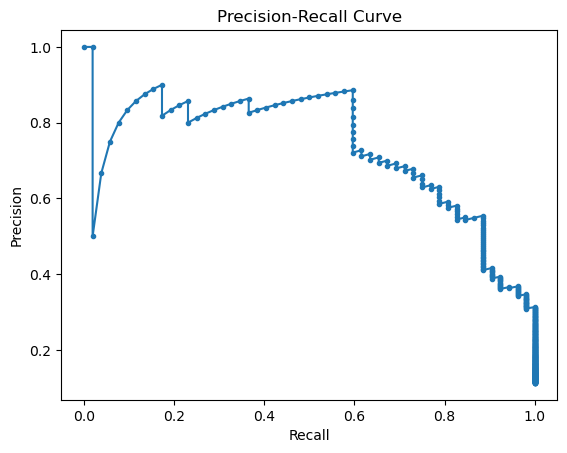

In [40]:
# Calculate ROC AUC and Precision-Recall Curve
roc_auc = roc_auc_score(y_test_resampled, y_prob_resampled, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")

precision, recall, _ = precision_recall_curve(y_test_resampled, y_prob_resampled[:, 1], pos_label=1)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [42]:
from sklearn.ensemble import StackingClassifier

# Initialize base models
base_models = [
    ('dt', DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)),
    ('svc', SVC(C=10, kernel='rbf', probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance'))
]



In [44]:
# Initialize the final estimator
final_estimator = LogisticRegression()



In [46]:
# Create and train the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator)
stacking_clf.fit(X_train, y_train)



StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=42)),
                               ('svc',
                                SVC(C=10, probability=True, random_state=42)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=3,
                                                     weights='distance'))],
                   final_estimator=LogisticRegression())

In [67]:
print(X_test.shape)
(432, 10, 18)


(432, 10, 18)


In [69]:
# Flatten X_test
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
print(X_test_flattened.shape)  # Should be (432, 180)


(432, 180)


In [71]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)


In [73]:
stacking_clf.fit(X_train_flattened, y_train)


StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=42)),
                               ('svc',
                                SVC(C=10, probability=True, random_state=42)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=3,
                                                     weights='distance'))],
                   final_estimator=LogisticRegression())

In [75]:
# Predict on the flattened test set
y_pred_stacking = stacking_clf.predict(X_test_flattened)

# Calculate accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking:.2f}")

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stacking))

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_stacking, target_names=le.classes_))


Stacking Classifier Accuracy: 0.51
Confusion Matrix:
[[36  1 11  4  2  0  2  6]
 [ 0 43  4  3  1  3  2  1]
 [ 2  1 25  3  6  1  6 12]
 [ 7  1  6 29  5  1  3  3]
 [ 5  0  7  7 24  0  6 12]
 [ 0 12  2  0  0 12  2  1]
 [ 2  9  3  5  4  2 24  4]
 [ 3  1 15  4  5  0  2 29]]
Classification Report:
              precision    recall  f1-score   support

       angry       0.65      0.58      0.62        62
        calm       0.63      0.75      0.69        57
   disgusted       0.34      0.45      0.39        56
     fearful       0.53      0.53      0.53        55
       happy       0.51      0.39      0.44        61
     neutral       0.63      0.41      0.50        29
         sad       0.51      0.45      0.48        53
   surprised       0.43      0.49      0.46        59

    accuracy                           0.51       432
   macro avg       0.53      0.51      0.51       432
weighted avg       0.52      0.51      0.51       432



In [48]:
#Predict and evaluate
y_pred_stacking = stacking_clf.predict(X_test)
print("Stacking Classifier Performance")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking, target_names=le.classes_))


Stacking Classifier Performance
[[44  1  7  1  3  0  2  4]
 [ 0 48  2  0  0  3  4  0]
 [ 1  2 36  2  8  0  2  5]
 [ 4  0  2 34  8  1  3  3]
 [ 6  1  5  1 34  2  2 10]
 [ 1 10  2  0  0 11  4  1]
 [ 0  2  5  1  4  2 35  4]
 [ 2  1  4  2  3  0  1 46]]
              precision    recall  f1-score   support

       angry       0.76      0.71      0.73        62
        calm       0.74      0.84      0.79        57
   disgusted       0.57      0.64      0.61        56
     fearful       0.83      0.62      0.71        55
       happy       0.57      0.56      0.56        61
     neutral       0.58      0.38      0.46        29
         sad       0.66      0.66      0.66        53
   surprised       0.63      0.78      0.70        59

    accuracy                           0.67       432
   macro avg       0.67      0.65      0.65       432
weighted avg       0.67      0.67      0.66       432

